In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

import cv2 as cv
import tarfile


In [3]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


Гипотеза 1: 
  metric lening


In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import Sequence

вАЖЕН ЛИ СПОСОБ СЖАТИЯ?


In [56]:
class CustomDataGenFace(Sequence):
  
  
  def __init__(self, 
               batch_size,
               input_size=(32, 32, 3),
               zipfile = '/gdrive/MyDrive/Face recognition/casia_faces.tar.gz',
               lab = 1,
               scale = [32,32],
               shuffle=True):

    super().__init__()
    self.__batch_size = batch_size # 1
    self.input_size = input_size # 
    self.shuffle = shuffle
    self.scale = scale
    self.lab = lab # Lab
    self.zipfile = zipfile
    if zipfile.endswith("tar.gz"):
      self.tar = tarfile.open(self.zipfile, "r:gz")
    elif zipfile.endswith("tar"):
      self.tar = tarfile.open(self.zipfile, "r:")
    self.ll = self.tar.getmembers( )
    self.tar.close()

  def __del__():
    
    #self.tar.close()
    super().__del__()
  
  def set_batch_size(self, batch_size):
        self.__batch_size = batch_size
        
 
  def get_batch_size(self):
        return self.__batch_size  


  def label_extract(self,index):
    try:
      print(index)
      s = self.ll[index].name.split('/')
      print(s)
      self.tar = tarfile.open(self.zipfile, "r:gz")
      self.tar.extract( self.ll[index] ) 
      self.tar.close()
      print(self.ll[index])
      if len(s)>2:
      #if s[-2].find('person_')>=0:
        k = s[-2].find('person_')
        print(k)
        if k>=0:
          label = s[-2][k+7:]
          print(label)
          return int(label)
        else:
          return -1  
      else:
        return -1
    except FileNotFoundError:
      return -1      
  
  def image_extract(self,index):
    try:
      s = self.ll[index].name
      print(s)
      img = cv.imread(s )
      if type(img) == type(cv.imread('')) :
        return np.zeros((1,32,32,3)), 0  
      else:
        img = cv.resize(img,(self.scale[1],self.scale[0]))
          
      if self.lab:
        img = cv.cvtColor(img, cv.COLOR_RGB2LAB)
      img = img.reshape(-1,self.scale[1],self.scale[0],3)
      return img, np.mean(img)
    except FileNotFoundError:
      return np.zeros((1,32,32,3)), 0
  
  #rotate image
  def rotation(self, image, angle):
    s = image.shape
    center=tuple(np.array([s[0],s[1]])/2)
    rot_mat = cv.getRotationMatrix2D(center,angle,1.0)
    new_image = cv.warpAffine(image, rot_mat, (s[1],s[0]))
    return 
    
  
    
  def on_epoch_end(self):
    pass
    
  def __getitem__(self, index):
    #print(index)
    image = []
    label = []
    try:
      i = 0
      ind = np.random.randint(0,100, (self.__batch_size*2))
      while (len(label)<self.__batch_size)&(i<self.__batch_size*2):
        
        k = self.label_extract(index+ind[i])
        if k>= 0:
          image_, m = self.image_extract(index+ind[i])
          if m>0:
            label_ = k
            print(image_.shape, label_)
            image.append(image_[0,:,:,:])
            label.append(label_)
        i += 1
          
      return np.array(image),np.array(label)
    except FileNotFoundError:
      return np.zeros((1,32,32,3)),-1* np.ones((1, ))
  def __len__(self):
    
    return len(self.ll) // self.batch_size

In [57]:
gen_d = CustomDataGenFace(10)

In [58]:
gen_d.set_batch_size(100)

In [75]:
gen_d.get_batch_size()

100

In [60]:
I,L = gen_d[10]

73
['casia_faces', 'person_6656', '4053b940-93ab-4f9c-ba40-ab0308e1ab7f.jpg']
<TarInfo 'casia_faces/person_6656/4053b940-93ab-4f9c-ba40-ab0308e1ab7f.jpg' at 0x7f571efc7ef0>
0
6656
casia_faces/person_6656/4053b940-93ab-4f9c-ba40-ab0308e1ab7f.jpg
(1, 32, 32, 3) 6656
103
['casia_faces', 'person_7342', '53197d35-1b29-47f3-ae24-b7ad61d9ce1d.jpg']
<TarInfo 'casia_faces/person_7342/53197d35-1b29-47f3-ae24-b7ad61d9ce1d.jpg' at 0x7f571f2c2870>
0
7342
casia_faces/person_7342/53197d35-1b29-47f3-ae24-b7ad61d9ce1d.jpg
(1, 32, 32, 3) 7342
45
['casia_faces', 'person_1694', '45297f75-dcfb-4374-a81e-4fb8df380fd4.jpg']
<TarInfo 'casia_faces/person_1694/45297f75-dcfb-4374-a81e-4fb8df380fd4.jpg' at 0x7f570bf7a530>
0
1694
casia_faces/person_1694/45297f75-dcfb-4374-a81e-4fb8df380fd4.jpg
(1, 32, 32, 3) 1694
61
['casia_faces', 'person_3171', '3df7bc31-a9f3-408f-8723-99ba1dc78ee7.jpg']
<TarInfo 'casia_faces/person_3171/3df7bc31-a9f3-408f-8723-99ba1dc78ee7.jpg' at 0x7f571efc7530>
0
3171
casia_faces/person_3171/

In [70]:
(L[:50]== L[50:50*2]).sum()/50

0.24

In [64]:
L

array([6656, 7342, 1694, 3171, 7342, 1454, 3171, 1694, 3171, 3171, 1694,
       6656, 1694, 1454, 6656, 3171, 1694, 7342, 3171, 6656, 7342, 3171,
       1694, 7342, 1694, 7342, 1694, 1694, 1454, 6656, 1694, 6656, 3171,
       1694, 3171, 1454, 6656, 1694, 1694, 7342, 1694, 1694, 6656, 1694,
       6656, 6656, 6656, 3171, 1694, 7342, 3171, 1694, 3171, 1694, 1694,
       1694, 1694, 1694, 1694, 3171, 3171, 7342, 6656, 1694, 1694, 1694,
       1694, 6656, 1454, 1694, 7342, 1694, 1694, 6656, 3171, 1694, 7342,
       3171, 7342, 6656, 6656, 1694, 3171, 1694, 3171, 1694, 3171, 7342,
       1694, 1694, 7342, 6656, 3171, 1694, 3171, 3171, 1694, 7342, 7342,
       7342])

In [71]:
#number уникальных пар
numb_L = []
for i in range(1,10000,100):
  I,L = gen_d[i]
  n = len(L) // 2
  dg = (L[:n] == L[n:n*2]).sum()
  print(dg)
  numb_L.append(dg)



Выходные данные были обрезаны до нескольких последних строк (5000).
['casia_faces', 'person_5050', '3ec2cbfc-358f-420a-93ed-03786d9219d9.jpg']
<TarInfo 'casia_faces/person_5050/3ec2cbfc-358f-420a-93ed-03786d9219d9.jpg' at 0x7f571290a530>
0
5050
casia_faces/person_5050/3ec2cbfc-358f-420a-93ed-03786d9219d9.jpg
(1, 32, 32, 3) 5050
9213
['casia_faces', 'person_8004', '6afac245-155c-4bea-9c1e-e61ae8f2e491.jpg']
<TarInfo 'casia_faces/person_8004/6afac245-155c-4bea-9c1e-e61ae8f2e491.jpg' at 0x7f57128f3ef0>
0
8004
casia_faces/person_8004/6afac245-155c-4bea-9c1e-e61ae8f2e491.jpg
(1, 32, 32, 3) 8004
9236
['casia_faces', 'person_8450', '048aa126-1ac5-42e7-9447-eede478827c0.jpg']
<TarInfo 'casia_faces/person_8450/048aa126-1ac5-42e7-9447-eede478827c0.jpg' at 0x7f57128fd1f0>
0
8450
casia_faces/person_8450/048aa126-1ac5-42e7-9447-eede478827c0.jpg
(1, 32, 32, 3) 8450
9274
['casia_faces', 'person_9185', '77ac6b62-fe80-4541-bfd5-e8380da24af7.jpg']
<TarInfo 'casia_faces/person_9185/77ac6b62-fe80-4541-bfd

In [77]:
dL = numb_L.copy()
numb_L = np.array(numb_L)/gen_d.get_batch_size()*2

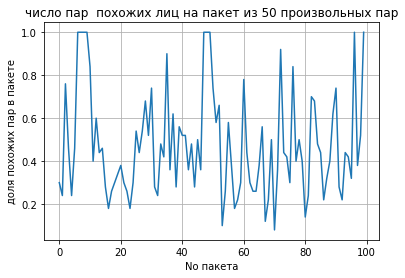

In [84]:
plt.title('число пар  похожих лиц на пакет из 50 произвольных пар')
plt.plot(numb_L)
plt.xlabel('No пакета')
plt.ylabel('доля похожих пар в пакете')
plt.grid(True)
plt.show()

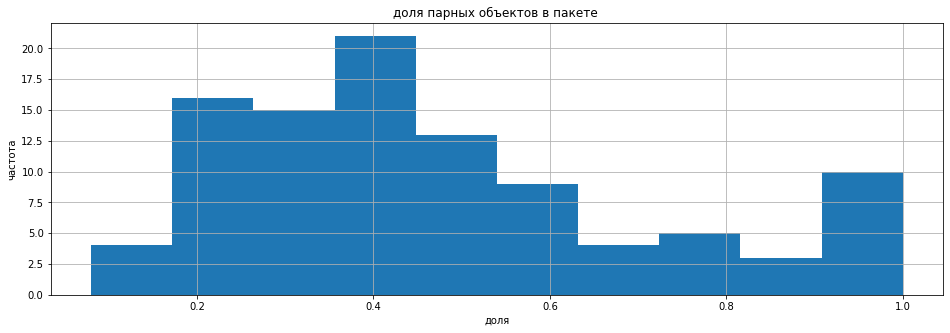

In [82]:

plt.figure(figsize = (16,5))
plt.hist(numb_L,bins=10)
plt.grid(True)
plt.title('доля парных объектов в пакете ')
plt.xlabel('доля')
plt.ylabel('частота')
plt.show()


In [ ]:
EMB_SIZE = 50

def net_creat(EMB_SIZE = 50, im_size = (64,64,3),X_size = 8, layer = [5,3]):
  # поток1 I
  inp_x_im = tf.keras.layers.Input(shape=(im_size[0], im_size[1], im_size[2]))
  inp_X = tf.keras.layers.Input(shape = (X_size,))
  x1 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inp_x_im)
  for k in range(layer[0]):
    x1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
    x1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
    x1 = tf.keras.layers.MaxPool2D((2, 2), (2, 2))(x1)
    
  x1 = tf.keras.layers.Flatten()(x1)
  # поток2 Х 
  x2 = tf.keras.layers.Dense(256, activation='relu')(inp_X)
  for k in range(layer[1]):
    x2 = tf.keras.layers.Dense(256 // (k+1), activation='relu')(inp_X)

  x = tf.keras.layers.Concatenate(axis = 1)([x2,x1])
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(EMB_SIZE, activation=None)(x)

  return tf.keras.models.Model( inputs =[inp_x_im,inp_X], outputs = x)  

In [ ]:
model = net_creat(EMB_SIZE = EMB_SIZE, im_size = (WX*2,WX*2,3),X_size=8, layer = [4,0])

In [ ]:
im_size=(WX*2,WX*2,3)

In [ ]:
model.load_weights(path_net +'siam_net.h5')

In [ ]:
NUM_EPOCHS =3 # число эпох 
NUM_BATCH = 40 # число пакетов

LEARNING_RATE = 0.001 # скорость обучения

# оптимизатор
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
# зазор
MARGIN = 100.0

In [ ]:

# https://www.pyimagesearch.com/2021/01/18/contrastive-loss-for-siamese-networks-with-keras-and-tensorflow/
# Функция потерь
def contastive_loss(embs, labels):
  # print(embs,labels)
  bs = embs.shape[0]
  embs1 = embs[:bs//2, :]
  embs2 = embs[bs//2:, :]
  
  labels1 = labels[:bs//2]
  labels2 = labels[bs//2:]
  #print(labels1,labels2)
  d2 = tf.reduce_sum(tf.square(embs1 - embs2), axis=1)
  d =  tf.sqrt(d2)
  z = tf.cast(labels1 == labels2, tf.float32)
    
    
  return tf.reduce_mean(z * d2 + (1-z) * tf.maximum(0, MARGIN - d)**2)

In [ ]:
# обучение сиамской сети

def train_step(model, I,X,L, ind, hist):
  '''
  Реализация одного шага обучения (для одной картинки по всем ее рамкам )
  model - модель, 
  I,X,L - признаки и метки, 
  ind - индексы для пакета
  '''
  for iteration,ind_iter  in enumerate(ind):
    #print(ind_iter)
    # Forward
    with tf.GradientTape() as tape:
        
        embs = model([ I[ind_iter,:,:,:],X[ind_iter,:]])
        #print(embs.numpy())
       
        loss_value = contastive_loss(embs, L[ind_iter])
       
        
    # Backward
    grads = tape.gradient(loss_value, model.variables)
    optimizer.apply_gradients(zip(grads, model.variables))
    hist.append(loss_value.numpy())
    if iteration % 20 == 0:
        if loss_value.numpy()!=0:
            print('[{}] Loss: {}'.format(iteration, loss_value.numpy()))
  return model, hist   

In [ ]:
image_shape = []
numb_bound = []
image_shape = []
numb_bound = []
hist = []

In [ ]:
# применим обучение модели для следующих эпох
for ch in range(NUM_EPOCHS):
  for image_name in jpeg_arr[:-1]:
    X,I,L, _,_,_,_ =image_clast(image_name, json_arr,  wx = WX, w = W, verbose = 0, kw = KW, im_proc=0.02, e_ps_max=300)
    ind = data_XIL(L,batch_size = 16, N = NUM_BATCH )
    model, hist = train_step(model, I,X,L, ind, hist)


In [ ]:
# вычисление метрики для вложеня (Euqlid)
def diff(e1, e2):
    return np.sum((e1 - e2)**2) ** 0.5

# вычисление пар по меткам
#for i in range(len(L)-1):
#  for j in range(i+1,len(L)): 
#    if (lab[j] != -1) & (lab[i] != -1):
#      print(lab[i],' <-> : ',lab[j], ' : ', diff(emb[i], emb[j]))

In [ ]:
# метрики по эмбедингу (вложению)
def my_embed_metric(X):
  net_dist = np.ones((X.shape[0],X.shape[0])) # нормированное расстояние - инициализация 1(пока)
  for i in range(X.shape[0]-1):
    for j in range(i+1,X.shape[0]):
      net_dist[i,j] = diff( X[i,2:6],X[j,2:6])
      net_dist[j,i] =  net_dist[i,j]
      
  return net_dist# 

def image_clast_net(image_name='', json_arr=[], model=None,  w = 15, centr = True, wx=32, e_ps = 30, e_ps_max = 100, im_proc = 0.1, verbose=1):
  '''
  полный цикл для кластер- анализа
  вход:
  image_name - имя картинки, json_arr - имя аннотации, verbose = 0, w = 15
  
  centr = True - строим картинки для данных из центроида (или False - из рамки ), 
  wx - размер половины картинки по любой оси
  w - число пикселей на расширение рамки в стороны  
   
  гиперпараметры алгоритма
  e_ps = 3, e_ps_max = 30 - по DBSCAN,
  im_proc = 0.1 - часть не отнесенных к кластерам картинок,  
  
  verbose = 1 - визуализировать результат (0 - не визуализировать)

  Строим признаки:
  Х массив векторов в составе:
   - центроиды (сх, су)
   - коробка из данных json (BoundingBox)
   - Размеры по Х, У (ширина , высота)
  I - картинка вокруг центроида (centr = True) или в рамке из box_bound (centr = Falce)
  L - разметка по кластеранализу
  iou,n_dist,m_dist - метрики 
  box_bound_clear - рамки
  
  ''' 
  X = []
  I = []
  L = []
  n_emb, box_bound_clear = [],[]
  c_cod = 0
  
  # картинке ставим в соответствие аннотацию
  box_bound, image, cod = annotation_read(image_name, json_arr)
  
  print(cod)
  if cod:
    # строим признаки 
    X,I, box_bound_clear, f_cod = feature_prep(box_bound,image, centr = centr, wx=wx, w = w)
    # строим метрики
    if f_cod:
      sample = [I,X]
      X_emb = model.predict(sample)
      n_emb = my_embed_metric(X_emb)
      if 0:
        plt.figure(figsize = (7,16))
     
        plt.imshow(n_emb)
        plt.title('Эмбединг')
    
        plt.show()
      # кластер-анализ  
      L,img_label, c_cod = claster_image(box_bound_clear, image ,
                                  metric_dist = n_emb, 
                                  e_ps = e_ps, e_ps_max = e_ps_max, 
                                  im_proc = im_proc,  
                                  verbose = verbose)
      
    else:
      print('нет фичей')
  else:
    print('не найден файл')
  return  X, I, L, n_emb, box_bound_clear, c_cod